In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Install Kaggle
!pip install kaggle


!mkdir -p ~/.kaggle
!cp '/content/drive/My Drive/kaggle /kaggle.json' ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


# Download and unzip dataset
!kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
!unzip -q gtsrb-german-traffic-sign.zip -d dataset


gtsrb-german-traffic-sign.zip: Skipping, found more recently modified local copy (use --force to force download)
replace dataset/Meta.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: [n]o
error:  invalid response [[n]o]
replace dataset/Meta.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint


In [ ]:
  checkpoint_filepath = '/content/drive/My Drive/Checkpoints/checkpoint'


In [ ]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


In [ ]:
!pip install scikit-learn

In [ ]:
import numpy as np  # For numerical operations
import pandas as pd  # For handling data in tables (dataframes)
import os  # For interacting with the operating system, like navigating file paths
import cv2  # OpenCV for image processing tasks
import matplotlib.pyplot as plt  # For plotting graphs and displaying images
import tensorflow as tf  # TensorFlow for building and training neural networks
from tensorflow import keras  # Keras is a high-level neural networks API, running on top of TensorFlow
from PIL import Image  # Python Imaging Library for opening, manipulating, and saving many different image file formats
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # For real-time data augmentation
from tensorflow.keras.optimizers import Adam  # Adam optimizer for training neural networks
from sklearn.metrics import accuracy_score  # For evaluating the accuracy of a model  this code

In [ ]:
import zipfile

In [ ]:
path_to_zip_file = r'/content/gtsrb-german-traffic-sign.zip'
directory_to_extract_to = r'/content/input'

# Extract the zip file
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

In [ ]:
#This is designed to construct paths to the training and test data directories,
#assuming that these directories are part of a dataset extracted into a specified location.

data_dir = '/content/input'  # Base directory for the dataset
train_path = os.path.join(data_dir, 'Train')
test_path = os.path.join(data_dir, 'Test')

In [ ]:
# Image dimensions
IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3

In [ ]:
# Check if the path is correct and list directories
if os.path.exists(data_dir):
    print("Directory structure of dataset:")
    for root, dirs, files in os.walk(data_dir, topdown=True):
        level = root.replace(data_dir, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print(f'{indent}{os.path.basename(root)}/')
        subindent = ' ' * 4 * (level + 1)
        for f in files[:5]:  # just list first 5 files for brevity
            print(f'{subindent}{f}')
else:
    print("The specified directory does not exist. Please check the path.")

Directory structure of dataset:
input/
    Test.csv
    Meta.csv
    Train.csv
    meta/
        16.png
        39.png
        35.png
        4.png
        15.png
    Train/
        19/
            00019_00005_00007.png
            00019_00001_00005.png
            00019_00000_00006.png
            00019_00003_00007.png
            00019_00003_00000.png
        13/
            00013_00015_00005.png
            00013_00034_00020.png
            00013_00028_00009.png
            00013_00032_00014.png
            00013_00021_00005.png
        35/
            00035_00012_00024.png
            00035_00030_00005.png
            00035_00023_00021.png
            00035_00003_00007.png
            00035_00003_00026.png
        16/
            00016_00005_00012.png
            00016_00009_00010.png
            00016_00007_00018.png
            00016_00009_00012.png
            00016_00006_00004.png
        18/
            00018_00038_00014.png
            00018_00000_00015.png
            00018_

In [ ]:
#demonstrates how to load and display the contents of a CSV file, presumably containing annotations for a dataset, such as the German Traffic Sign Recognition Benchmark (GTSRB)
csv_file = os.path.join(data_dir, 'Train.csv')
if os.path.isfile(csv_file):
    annotations = pd.read_csv(csv_file)
    print("CSV file contents:")
    print(annotations.head())

CSV file contents:
   Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId  \
0     27      26       5       5      22      20       20   
1     28      27       5       6      23      22       20   
2     29      26       6       5      24      21       20   
3     28      27       5       6      23      22       20   
4     28      26       5       5      23      21       20   

                             Path  
0  Train/20/00020_00000_00000.png  
1  Train/20/00020_00000_00001.png  
2  Train/20/00020_00000_00002.png  
3  Train/20/00020_00000_00003.png  
4  Train/20/00020_00000_00004.png  


In [ ]:
#The number of categories, based on the hypothetical structure provided and assuming a scenario similar to the  (GTSRB), is 43
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

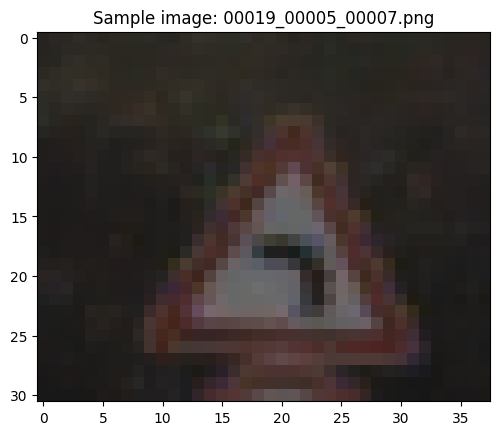

In [ ]:
# Display the first image in the training set
train_path = os.path.join(data_dir, 'Train')
train_classes = os.listdir(train_path)
first_class_path = os.path.join(train_path, train_classes[0])
first_image_file = os.listdir(first_class_path)[0]

image_path = os.path.join(first_class_path, first_image_file)
image = Image.open(image_path)
plt.imshow(image)
plt.title(f"Sample image: {first_image_file}")
plt.show()

In [ ]:
#how to load and display the contents of a CSV file, Meta.csv, which presumably contains metadata for a dataset
meta_csv_path ='/content/input/Meta.csv'
meta_data = pd.read_csv(meta_csv_path)

# Display the label names
print(meta_data)

           Path  ClassId  ShapeId  ColorId SignId
0   Meta/27.png       27        0        0   1.32
1    Meta/0.png        0        1        0   3.29
2    Meta/1.png        1        1        0   3.29
3   Meta/10.png       10        1        0   3.27
4   Meta/11.png       11        0        0   1.22
5   Meta/12.png       12        2        2    2.3
6   Meta/13.png       13        4        0    2.1
7   Meta/14.png       14        3        0    2.2
8   Meta/15.png       15        1        0    3.1
9   Meta/16.png       16        1        0    3.3
10  Meta/17.png       17        1        0   3.21
11  Meta/18.png       18        0        0   1.39
12  Meta/19.png       19        0        0    1.2
13   Meta/2.png        2        1        0   3.29
14  Meta/20.png       20        0        0    1.1
15  Meta/21.png       21        0        0  1.3.2
16  Meta/22.png       22        0        0    1.1
17  Meta/23.png       23        0        0   1.13
18  Meta/24.png       24        0        0  1.5.2


In [ ]:
#Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)',
            2:'Speed limit (50km/h)',
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)',
            5:'Speed limit (80km/h)',
            6:'End of speed limit (80km/h)',
            7:'Speed limit (100km/h)',
            8:'Speed limit (120km/h)',
            9:'No passing',
            10:'No passing veh over 3.5 tons',
            11:'Right-of-way at intersection',
            12:'Priority road',
            13:'Yield',
            14:'Stop',
            15:'No vehicles',
            16:'Veh > 3.5 tons prohibited',
            17:'No entry',
            18:'General caution',
            19:'Dangerous curve left',
            20:'Dangerous curve right',
            21:'Double curve',
            22:'Bumpy road',
            23:'Slippery road',
            24:'Road narrows on the right',
            25:'Road work',
            26:'Traffic signals',
            27:'Pedestrians',
            28:'Children crossing',
            29:'Bicycles crossing',
            30:'Beware of ice/snow',
            31:'Wild animals crossing',
            32:'End speed + passing limits',
            33:'Turn right ahead',
            34:'Turn left ahead',
            35:'Ahead only',
            36:'Go straight or right',
            37:'Go straight or left',
            38:'Keep right',
            39:'Keep left',
            40:'Roundabout mandatory',
            41:'End of no passing',
            42:'End no passing veh > 3.5 tons' }

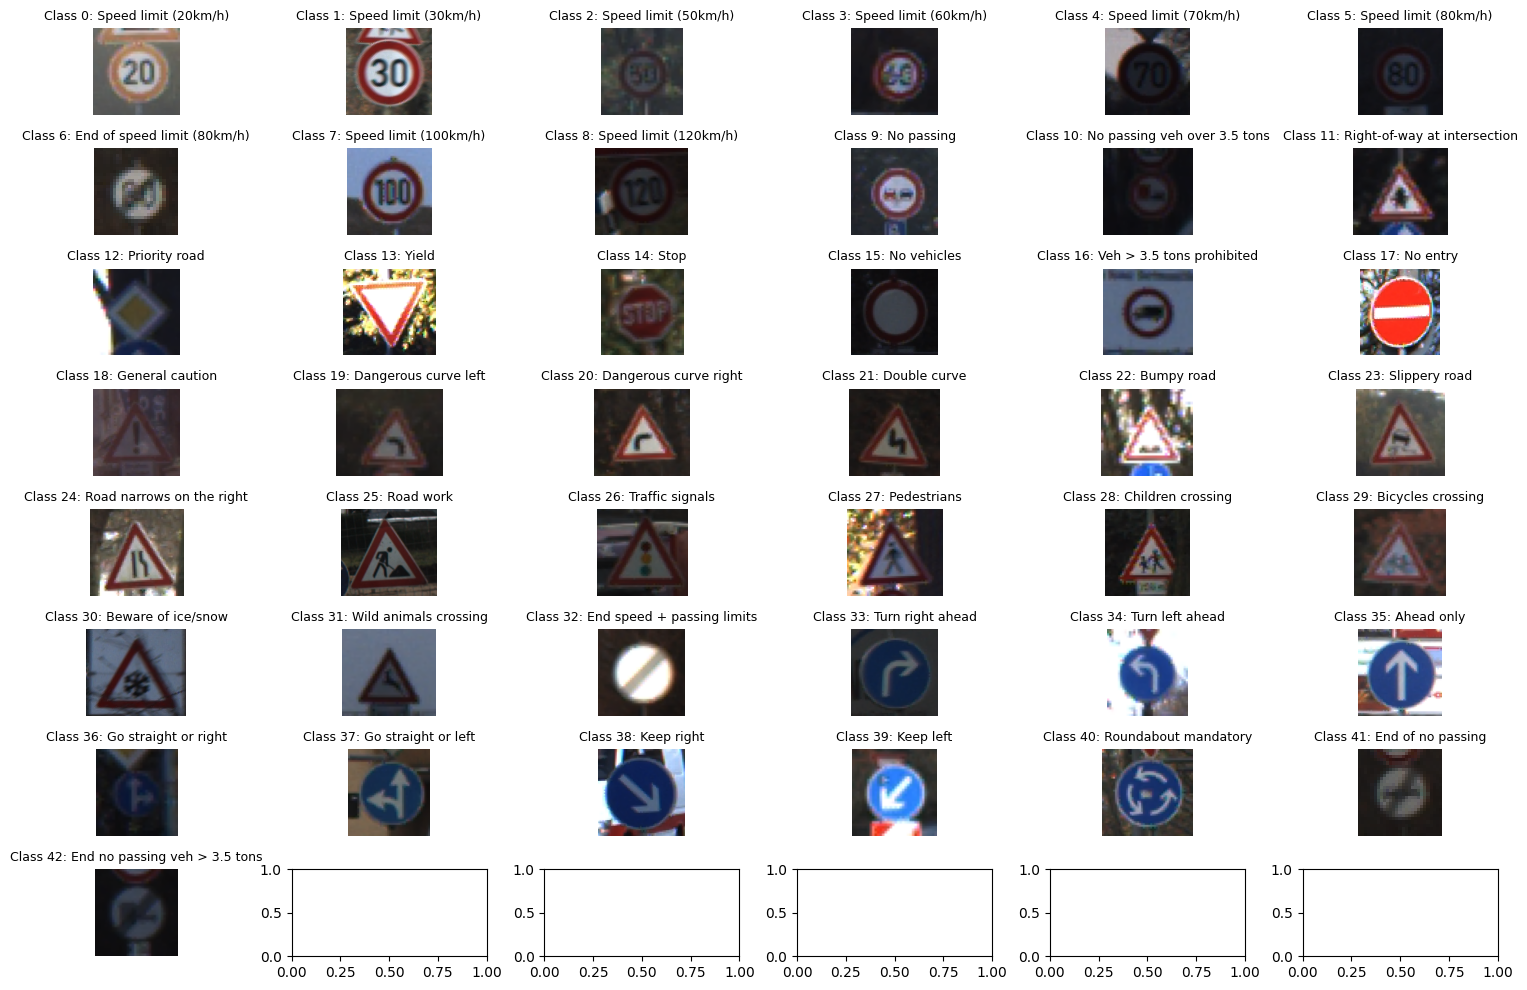

In [ ]:
# Create a visual grid with subplots: Adjust the figsize and layout as needed
fig, axes = plt.subplots(nrows=8, ncols=6, figsize=(15, 10))  # Adjust the grid size to the number of classes
axes = axes.flatten()  # Flatten the array of axes for easy iteration

for class_id, class_name in classes.items():
    # Find the directory corresponding to the current class
    class_dir = os.path.join(train_path, str(class_id))
    # Get the paths for all images in this class directory
    image_paths = [os.path.join(class_dir, img_name) for img_name in os.listdir(class_dir)]
    # Select the first image path (as an example)
    image_path = image_paths[0]  # Take the first image for each class
    # Load the image
    image = Image.open(image_path)
    # Plot the image on the corresponding subplot
    ax = axes[class_id]
    ax.imshow(image)
    ax.set_title(f'Class {class_id}: {class_name}', fontsize=9)
    ax.axis('off')  # Hide the axes ticks

# Adjust the layout
plt.tight_layout()
plt.show()

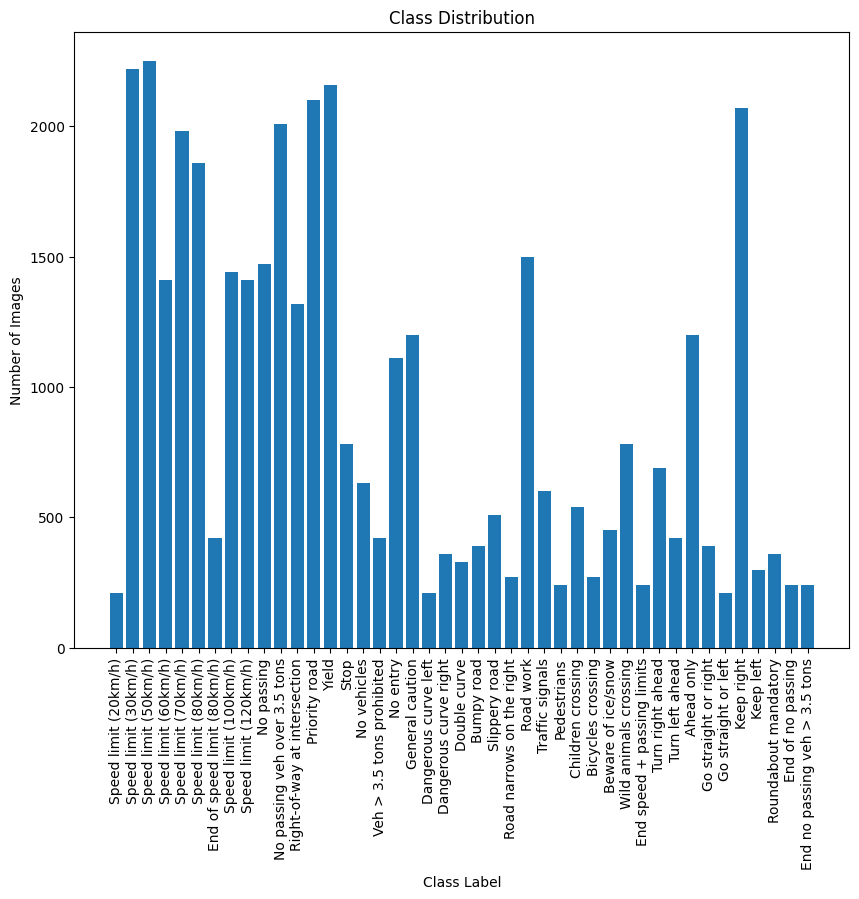

In [ ]:
#how to calculate and visualize the distribution of classes within a dataset, specifically using class names for clarity.
from collections import Counter


class_counts = Counter()

for class_id in classes.keys():
    class_dir = os.path.join(train_path, str(class_id))
    class_counts[classes[class_id]] = len(os.listdir(class_dir))  # Use class name instead of ID

# Plotting the class distribution using class names
labels = list(class_counts.keys())
values = list(class_counts.values())

plt.figure(figsize=(10, 8))  # Adjust the figure size as needed for better label readability
plt.bar(labels, values)
plt.xlabel('Class Label')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
plt.xticks(rotation=90)  # Rotate labels to prevent overlap
plt.show()


In [ ]:
#The provided code defines a function is_blurry and uses it to count the number of blurry images in each class of a dataset. Below is an explanation of the code and its components#
def is_blurry(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    fm = cv2.Laplacian(gray, cv2.CV_64F).var()
    return fm < 200


blurry_images_count = Counter()  # Counter to hold the number of blurry images per class

for class_id, class_name in classes.items():
    class_dir = os.path.join(train_path, str(class_id))
    for img_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, img_name)
        if is_blurry(image_path):
            blurry_images_count[class_name] += 1

# Printing a table of classes and their number of blurry images
print("Class Name\tNumber of Blurry Images")
print("-" * 40)  # Separator for readability
for class_name, count in blurry_images_count.items():
    print(f"{class_name}\t{count}")


for class_name in classes.values():
    if class_name not in blurry_images_count:
        print(f"{class_name}\t0")



Class Name	Number of Blurry Images
----------------------------------------
Speed limit (20km/h)	3
Speed limit (30km/h)	149
Speed limit (50km/h)	133
Speed limit (60km/h)	299
Speed limit (70km/h)	441
Speed limit (80km/h)	531
End of speed limit (80km/h)	195
Speed limit (100km/h)	318
Speed limit (120km/h)	594
No passing	94
No passing veh over 3.5 tons	870
Right-of-way at intersection	124
Priority road	381
Yield	452
Stop	13
No vehicles	59
Veh > 3.5 tons prohibited	95
No entry	169
General caution	185
Dangerous curve left	30
Dangerous curve right	116
Bumpy road	2
Slippery road	57
Road narrows on the right	30
Road work	233
Traffic signals	123
Pedestrians	7
Children crossing	53
Bicycles crossing	1
Beware of ice/snow	120
Wild animals crossing	302
End speed + passing limits	40
Turn right ahead	71
Turn left ahead	58
Ahead only	78
Go straight or right	47
Go straight or left	1
Keep right	484
Keep left	68
Roundabout mandatory	30
End of no passing	31
End no passing veh > 3.5 tons	114
Double curve	0


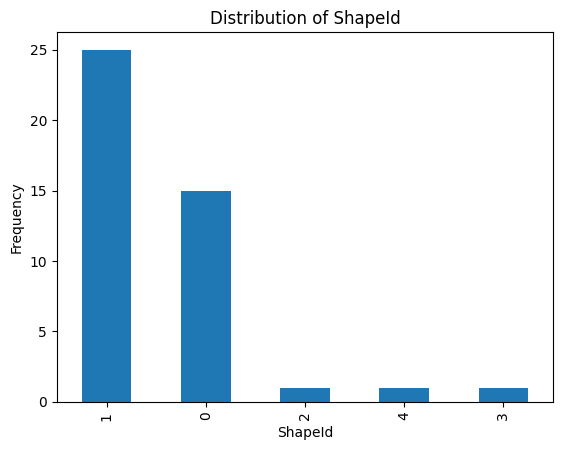

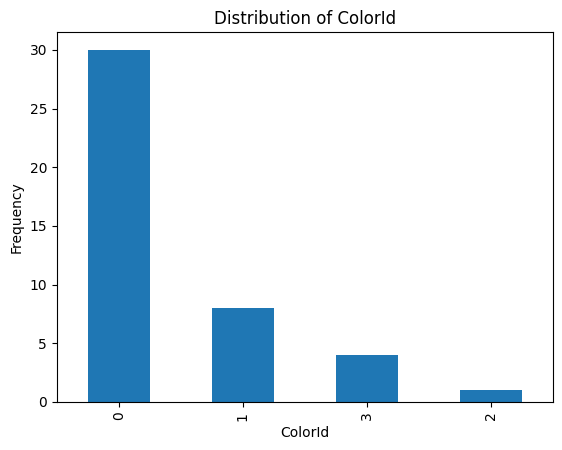

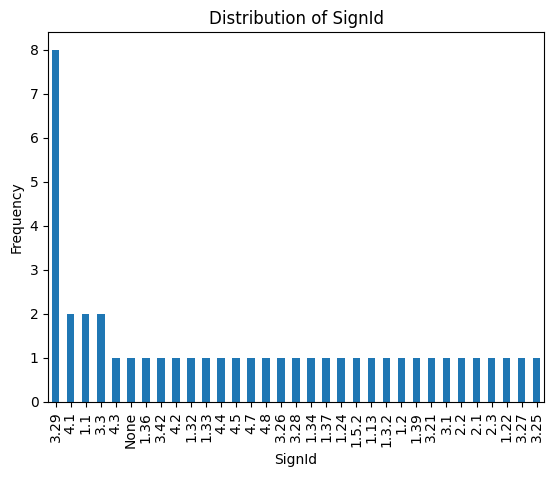

In [ ]:
#to visualize the distribution of different categorical variables in a dataset contained within a pandas DataFrame called meta_data.
#It creates bar charts for three different variables: 'ShapeId', 'ColorId', and 'SignId'.

shape_id_counts = meta_data['ShapeId'].value_counts()
shape_id_counts.plot(kind='bar')
plt.xlabel('ShapeId')
plt.ylabel('Frequency')
plt.title('Distribution of ShapeId')
plt.show()

# Repeat for 'ColorId' and 'SignId'
shape_id_counts = meta_data['ColorId'].value_counts()
shape_id_counts.plot(kind='bar')
plt.xlabel('ColorId')
plt.ylabel('Frequency')
plt.title('Distribution of ColorId')
plt.show()

shape_id_counts = meta_data['SignId'].value_counts()
shape_id_counts.plot(kind='bar')
plt.xlabel('SignId')
plt.ylabel('Frequency')
plt.title('Distribution of SignId')
plt.show()

In [ ]:
# Generate a list of dictionaries, each containing an image's details
data = []
for class_dir in os.listdir(train_path):
    class_path = os.path.join(train_path, class_dir)
    for image_name in os.listdir(class_path):
        data.append({
            'ImagePath': os.path.join(class_path, image_name),
            'ClassLabel': class_dir
            # Add more attributes here if available, e.g., 'Shape', 'Color', etc.
        })

# Create a DataFrame
df = pd.DataFrame(data)

In [ ]:
#To count the number of images for each sign type within a training dataset and print out the counts for a selected set of sign types.
image_counts_per_class = {class_name: len(os.listdir(os.path.join(train_path, str(class_id)))) for class_id, class_name in classes.items()}

# Print the count of images for each sign type
for class_name, count in image_counts_per_class.items():
    print(f"{class_name}: {count} images")


Speed limit (20km/h): 210 images
Speed limit (30km/h): 2220 images
Speed limit (50km/h): 2250 images
Speed limit (60km/h): 1410 images
Speed limit (70km/h): 1980 images
Speed limit (80km/h): 1860 images
End of speed limit (80km/h): 420 images
Speed limit (100km/h): 1440 images
Speed limit (120km/h): 1410 images
No passing: 1470 images
No passing veh over 3.5 tons: 2010 images
Right-of-way at intersection: 1320 images
Priority road: 2100 images
Yield: 2160 images
Stop: 780 images
No vehicles: 630 images
Veh > 3.5 tons prohibited: 420 images
No entry: 1110 images
General caution: 1200 images
Dangerous curve left: 210 images
Dangerous curve right: 360 images
Double curve: 330 images
Bumpy road: 390 images
Slippery road: 510 images
Road narrows on the right: 270 images
Road work: 1500 images
Traffic signals: 600 images
Pedestrians: 240 images
Children crossing: 540 images
Bicycles crossing: 270 images
Beware of ice/snow: 450 images
Wild animals crossing: 780 images
End speed + passing limi

In [ ]:
# To calculates the total number of images across all classes that are categorized as speed limit signs
speed_limit_counts = sum(image_counts_per_class[class_name] for class_name in classes.values() if "Speed limit" in class_name)
print(f"Total images for speed limit signs: {speed_limit_counts}")


Total images for speed limit signs: 12780


In [ ]:
#This performs a comparison between two categories of traffic signs, "mandatory" and "prohibition" signs.
mandatory_signs = ['Yield', 'Stop', 'Ahead only']
prohibition_signs = ['No passing', 'No entry', 'No vehicles']

mandatory_count = sum(image_counts_per_class.get(sign, 0) for sign in mandatory_signs)
prohibition_count = sum(image_counts_per_class.get(sign, 0) for sign in prohibition_signs)

print(f"Total images for mandatory signs: {mandatory_count}")
print(f"Total images for prohibition signs: {prohibition_count}")


Total images for mandatory signs: 4140
Total images for prohibition signs: 3210


In [ ]:
#The provided code snippet sorts the traffic sign types by the number of images in ascending order and prints the five sign types with the fewest images.
least_common_signs = sorted(image_counts_per_class.items(), key=lambda x: x[1])[:5]  # Get top 5 rarest signs

print("Rarest signs and their image counts:")
for sign, count in least_common_signs:
    print(f"{sign}: {count} images")


Rarest signs and their image counts:
Speed limit (20km/h): 210 images
Dangerous curve left: 210 images
Go straight or left: 210 images
Pedestrians: 240 images
End speed + passing limits: 240 images


In [ ]:
#This code snippet appears to be part of a data preprocessing pipeline for loading and preparing image data for a machine learning model.
image_data = []
image_labels = []

for i in range(NUM_CATEGORIES):
    path = data_dir + '/Train/' + str(i)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error in " + img)

# Changing the list to numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)

(39209, 30, 30, 3) (39209,)


In [ ]:
#This code is shuffling the order of the data in image_data and the corresponding labels in image_labels using NumPy.
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

In [ ]:
# initialize an empty list to hold the performance metrics for each model.
models_performance = []

In [ ]:
!pip install joblib
from joblib import dump

In [ ]:
# Random Forest integration starts here
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming image_data and image_labels are properly loaded and preprocessed
# Flatten the images for Random Forest
X_rf = image_data.reshape(image_data.shape[0], -1)
y_rf = image_labels

# Split data into training and test sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_clf.fit(X_train_rf, y_train_rf)

# Predict on the test data
y_pred_rf = rf_clf.predict(X_test_rf)

# Calculate metrics
accuracy_rf = accuracy_score(y_test_rf, y_pred_rf)
precision_rf = precision_score(y_test_rf, y_pred_rf, average='macro')
recall_rf = recall_score(y_test_rf, y_pred_rf, average='macro')
f1_score_rf = f1_score(y_test_rf, y_pred_rf, average='macro')

print(f"Accuracy of Random Forest: {accuracy_rf * 100:.2f}%")
print(f"Precision: {precision_rf:.2f}, Recall: {recall_rf:.2f}, F1-Score: {f1_score_rf:.2f}")

# Ensure models_performance is initialized
models_performance.append({
    'Model': 'Random Forest',
    'Accuracy': accuracy_rf,
    'Precision': precision_rf,
    'Recall': recall_rf,
    'F1-Score': f1_score_rf
})

# Random Forest integration ends here


Accuracy of Random Forest: 98.15%
Precision: 0.99, Recall: 0.98, F1-Score: 0.98


In [ ]:
#This code snippet is preparing the data for training and validation by splitting it into training and validation sets and normalizing the pixel values.
X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.3, random_state=42, shuffle=True)

X_train = X_train/255
X_val = X_val/255



In [ ]:

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape",y_val.shape)

X_train.shape (27446, 30, 30, 3)
X_valid.shape (11763, 30, 30, 3)
y_train.shape (27446,)
y_valid.shape (11763,)


In [ ]:
y_train = keras.utils.to_categorical(y_train, NUM_CATEGORIES)
y_val = keras.utils.to_categorical(y_val, NUM_CATEGORIES)

print(y_train.shape)
print(y_val.shape)

(27446, 43)
(11763, 43)


In [ ]:
# SVM integration starts here

from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

# Flatten the images for SVM (this should be done after loading and preprocessing)
X = image_data.reshape(image_data.shape[0], -1)
y = image_labels

# Split data into training and test sets
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X, y, test_size=0.2, random_state=42)

# Dimensionality reduction with PCA
pca = PCA(n_components=0.8, whiten=True)  # retain 80% of variance
X_train_pca = pca.fit_transform(X_train_svm)
X_test_pca = pca.transform(X_test_svm)

# Create a classifier: a support vector classifier
svc = svm.SVC(kernel='linear')  # Experiment with kernel="linear", "poly", "rbf"

# Fit the model
svc.fit(X_train_pca, y_train_svm)

# Predict on the test data
y_pred_svm = svc.predict(X_test_pca)

# Calculate the accuracy
accuracy_svm = accuracy_score(y_test_svm, y_pred_svm)
print(f"Accuracy of SVM: {accuracy_svm * 100:.2f}%")

# SVM integration ends here

Accuracy of SVM: 34.53%


In [ ]:
#This code defines a convolutional neural network (CNN) model for image classification using Keras
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,channels)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),

    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),

    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),

    keras.layers.Dense(43, activation='softmax')
])

In [ ]:
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
learning_rate  =0.001
epochs =30
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=learning_rate,
    decay_steps=1000,
    decay_rate=0.9,
    staircase=True)
opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
NUM_CATEGORIES = 43


In [ ]:
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

history = model.fit(aug.flow(X_train, y_train, batch_size=32), epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/30
858/858 [==============================] - 30s 26ms/step - loss: 1.0142 - accuracy: 0.7229 - val_loss: 0.0896 - val_accuracy: 0.9709
Epoch 2/30
858/858 [==============================] - 20s 23ms/step - loss: 0.1763 - accuracy: 0.9480 - val_loss: 0.0508 - val_accuracy: 0.9853
Epoch 3/30
858/858 [==============================] - 21s 24ms/step - loss: 0.1070 - accuracy: 0.9670 - val_loss: 0.0150 - val_accuracy: 0.9950
Epoch 4/30
858/858 [==============================] - 19s 23ms/step - loss: 0.0769 - accuracy: 0.9759 - val_loss: 0.0156 - val_accuracy: 0.9957
Epoch 5/30
858/858 [==============================] - 22s 25ms/step - loss: 0.0617 - accuracy: 0.9805 - val_loss: 0.0113 - val_accuracy: 0.9967
Epoch 6/30
858/858 [==============================] - 21s 24ms/step - loss: 0.0512 - accuracy: 0.9849 - val_loss: 0.0250 - val_accuracy: 0.9918
Epoch 7/30
858/858 [==============================] - 21s 24ms/step - loss: 0.0413 - accuracy: 0.9872 - val_loss: 0.0217 - val_accuracy:

In [ ]:
#This code defines a K-Nearest Neighbors (K-NN) implementation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split  # Importing train_test_split

# Flatten the images for the K-NN
X_knn = image_data.reshape(image_data.shape[0], -1)
y_knn = image_labels

# Split data into training and test sets
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size=0.2, random_state=42)

# Create a K-Nearest Neighbors classifier
# n_neighbors is a hyperparameter that  needs to tune for the best results
knn_clf = KNeighborsClassifier(n_neighbors=3)

# Fit the model on the training data
knn_clf.fit(X_train_knn, y_train_knn)

# Predict on the test data
y_pred_knn = knn_clf.predict(X_test_knn)

# Calculate the accuracy
accuracy_knn = accuracy_score(y_test_knn, y_pred_knn)
print(f"Accuracy of K-Nearest Neighbors: {accuracy_knn * 100:.2f}%")

# This is the end of KNN


Accuracy of K-Nearest Neighbors: 89.80%


In [ ]:
#This code defines a K-Nearest Neighbors (K-NN) implementation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np

# Assuming 'image_data' and 'image_labels' are defined elsewhere in your notebook

# Flatten the images for the K-NN
X_knn = image_data.reshape(image_data.shape[0], -1)
y_knn = image_labels

# Split data into training and test sets
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size=0.2, random_state=42)

# Initial K-NN Classifier for comparison
initial_knn_clf = KNeighborsClassifier(n_neighbors=3)
initial_knn_clf.fit(X_train_knn, y_train_knn)
initial_y_pred_knn = initial_knn_clf.predict(X_test_knn)
initial_accuracy_knn = accuracy_score(y_test_knn, initial_y_pred_knn)
print(f"Initial Accuracy of K-Nearest Neighbors: {initial_accuracy_knn * 100:.2f}%")

# Define a range of values for 'n_neighbors' and 'weights' for tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

# GridSearchCV for hyperparameter tuning with 5-fold cross-validation
# Utilize all available CPU cores
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=-1)
grid_search_knn.fit(X_train_knn, y_train_knn)

# Best hyperparameters and model
print("Best hyperparameters:", grid_search_knn.best_params_)
best_knn = grid_search_knn.best_estimator_

# Evaluate the optimized K-NN model
optimized_y_pred_knn = best_knn.predict(X_test_knn)
optimized_accuracy_knn = accuracy_score(y_test_knn, optimized_y_pred_knn)
print(f"Optimized Accuracy of K-Nearest Neighbors: {optimized_accuracy_knn * 100:.2f}%")


Initial Accuracy of K-Nearest Neighbors: 90.09%
Best hyperparameters: {'n_neighbors': 3, 'weights': 'distance'}
Optimized Accuracy of K-Nearest Neighbors: 91.44%


In [ ]:
!pip install joblib
from joblib import dump

# Assuming `best_knn` is your optimized K-NN model
dump(best_knn, '/content/drive/My Drive/optimized_knn_model.joblib')

['/content/drive/My Drive/optimized_knn_model.joblib']

In [ ]:
#implementing InceptionV3

from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load pre-trained InceptionV3 model, exclude the top layer
base_model = InceptionV3(weights='imagenet', include_top=False)

# Add a global spatial average pooling layer as the new top layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully-connected layer
x = Dense(1024, activation='relu')(x)

# Define the number of unique classes in the GTSRB dataset
NUM_CLASSES = 43  # GTSRB dataset has 43 unique traffic sign classes

# And a logistic layer for classes
predictions = Dense(NUM_CLASSES, activation='softmax')(x)

# This is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model using 'learning_rate' instead of 'lr'
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv2d_286 (Conv2D)         (None, None, None, 32)       864       ['input_4[0][0]']             
                                                                                                  
 batch_normalization_285 (B  (None, None, None, 32)       96        ['conv2d_286[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_282 (Activation  (None, None, None, 32)       0         ['batch_normalization_28